In [6]:
import pandas as pd
import numpy as np
# from google.colab import drive
from scipy import signal
import matplotlib.pyplot as plt
import os

In [7]:
# drive.mount('/content/drive')

In [8]:
def coord_sep(data, coord):
  data = data.iloc[:, 0:41]
  if coord == 'x':
    ind = [item*3 for item in range(101)]
  if coord == 'y':
    ind = [item*3+1 for item in range(101)]
  if coord == 'z':
    ind = [item*3+2 for item in range(101)]
  f_data = data.iloc[ind]
  f_data = f_data.reset_index(drop=True)
  return f_data, ind

def my_filter(data, order=5, fc=10, fs=100):
  fs = fs  # sample rate
  fc = fc  # cut-off frequency
  w = fc / (fs / 2)  # normalize the frequency
  b, a = signal.butter(order, w, 'low')  # 5 represents the order of the filter
  my_array = np.zeros((101, 41))
  for i in range(41):
    my_array[:, i] = signal.filtfilt(b, a, data.iloc[:, i])
  my_df  = pd.DataFrame(my_array)
  return my_df



In [9]:
def read_data(folder_path, i=1):
  path2store = os.path.join(folder_path, f's{i}_filtered' ) # path to filtered data folder
  path_data = os.path.join(folder_path, f's{i}') # path to raw data folder
  os.makedirs(path2store, exist_ok= True)
  ext = '.txt'
  for item in os.listdir(path_data):
    path2data = os.path.join(path_data, item)
    path2re = os.path.join(path2store, f'{item.replace(ext, "")}_f.csv')
    my_df = pd.read_csv(path2data, header=None)
    my_df_info = my_df.iloc[:, 41]

    coords = ['x', 'y', 'z']
    data_ls = []
    for it in coords:
      f, f_ind = coord_sep(my_df, coord=it)
      f_filter = my_filter(f)
      my_df.iloc[f_ind, 0:41] = f_filter
      data_ls.append(f_filter)

    # final_df = pd.concat(data_ls, ignore_index=True)
    # final_df = pd.concat([final_df, my_df_info], axis=1,  ignore_index=True)
    my_df.to_csv(path2re, index=False, header=None)




In [10]:
for j in range(1):
  read_data(folder_path=r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\converted_data', i=j+1)

# Example

In [11]:
s_r = pd.read_csv(r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\converted_data\s1\processed_L1_frames_350-650_technique_stoop_hand_1_new.csv', header=None)
s_f = pd.read_csv(r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\converted_data\s1_filtered\processed_L1_frames_350-650_technique_stoop_hand_1_new.csv_f.csv', header=None)

In [12]:
s_f

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-86.828880,79.255042,-96.496066,46.338189,-26.884961,-27.294189,-15.672757,-7.288880,66.801396,-22.645105,...,-145.478536,-113.336734,-110.024469,173.527064,150.567260,158.325128,116.336562,65.480214,114.137869,-31.844705
1,103.890748,71.575542,-21.874876,-48.429399,-53.526274,-81.325680,78.251636,147.112083,-133.554786,-63.919151,...,24.297152,-35.592783,159.140401,99.380354,38.510412,16.276624,-1.120645,-48.679868,135.217629,561.960858
2,1593.151954,1582.334634,1572.411146,1566.490368,1441.454120,1092.833022,1352.107449,1203.184971,1249.528388,1059.714677,...,54.043313,47.435370,28.737921,737.097486,459.561097,360.136038,63.407392,48.949898,25.292710,278.650391
3,-86.577325,79.818986,-96.374117,46.441649,-26.771908,-27.256280,-15.546692,-7.187955,66.789160,-22.611594,...,-145.477450,-113.335308,-110.045873,173.552985,150.550329,158.317261,116.317757,65.490735,114.117713,1.000000
4,104.417191,72.024481,-21.359650,-48.093449,-53.387061,-81.159602,78.436851,147.222426,-133.415664,-63.693871,...,24.293788,-35.592186,159.087041,99.641661,38.686787,16.304784,-1.127142,-48.713727,135.235547,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,565.163635,584.247860,533.023614,553.231418,451.111131,119.751257,395.468020,190.978165,317.372672,74.423532,...,18.129704,-38.591760,158.631508,-15.607989,-42.939573,-46.993660,-5.673228,-52.182874,134.721640,0.000000
299,866.164705,853.099077,986.981178,974.804623,982.574224,1091.741295,829.147146,826.517701,994.248383,1081.330907,...,55.326473,41.399296,28.858428,720.962423,452.656988,353.864274,62.683507,47.455635,25.934979,0.000000
300,-182.181997,-13.161271,-152.608763,-7.690865,-45.930313,-13.552808,-70.461892,-72.219724,90.657163,-10.752218,...,-143.989688,-111.569067,-108.395692,197.413482,164.012812,167.998511,118.417159,67.576674,113.060909,0.000000
301,564.832696,584.059793,532.470183,552.832154,450.796066,119.194720,395.402759,190.676184,316.962380,73.894386,...,18.107408,-38.574667,158.627882,-15.655521,-42.830311,-46.861839,-5.693959,-52.155887,134.717065,0.000000


In [13]:
s_r_x, _ = coord_sep(s_r, coord='x')
s_r_y, _ = coord_sep(s_r, coord='y')
s_r_z, _ = coord_sep(s_r, coord='z')

In [14]:
s_f_x, _ = coord_sep(s_f, coord='x')
s_f_y, _ = coord_sep(s_f, coord='y')
s_f_z, _ = coord_sep(s_f, coord='z')

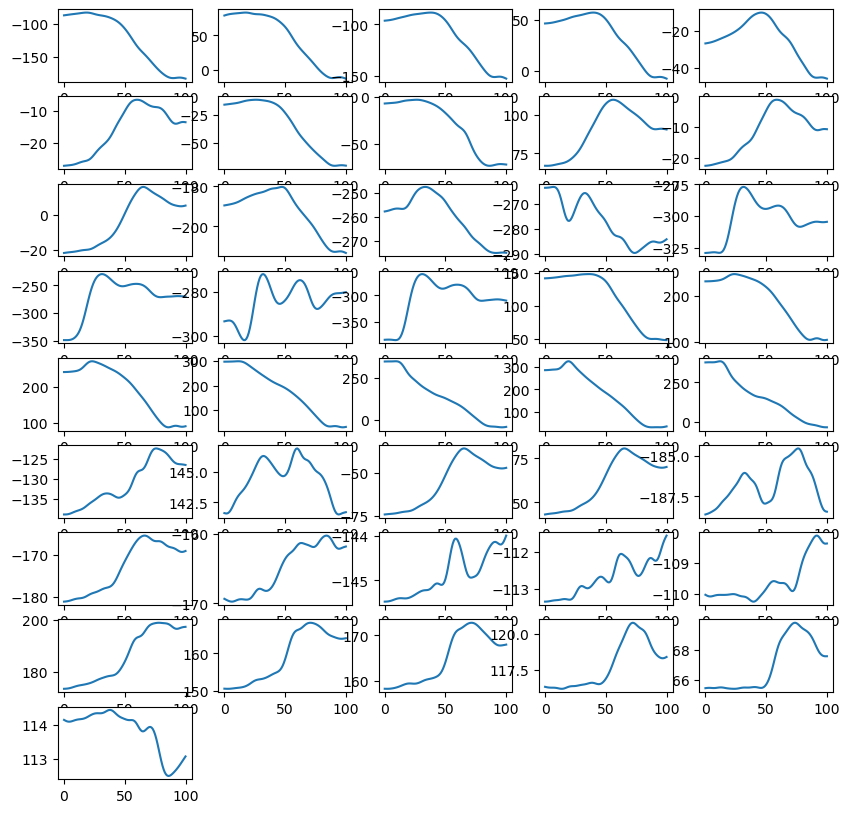

In [15]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_f_x.iloc[:, i])

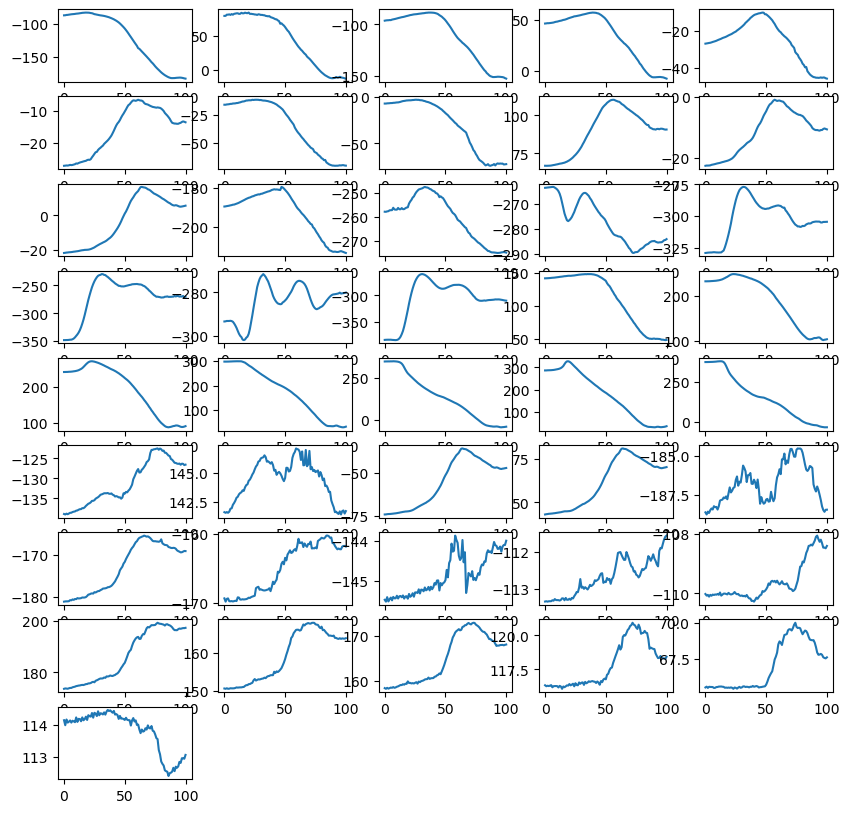

In [16]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_r_x.iloc[:, i])

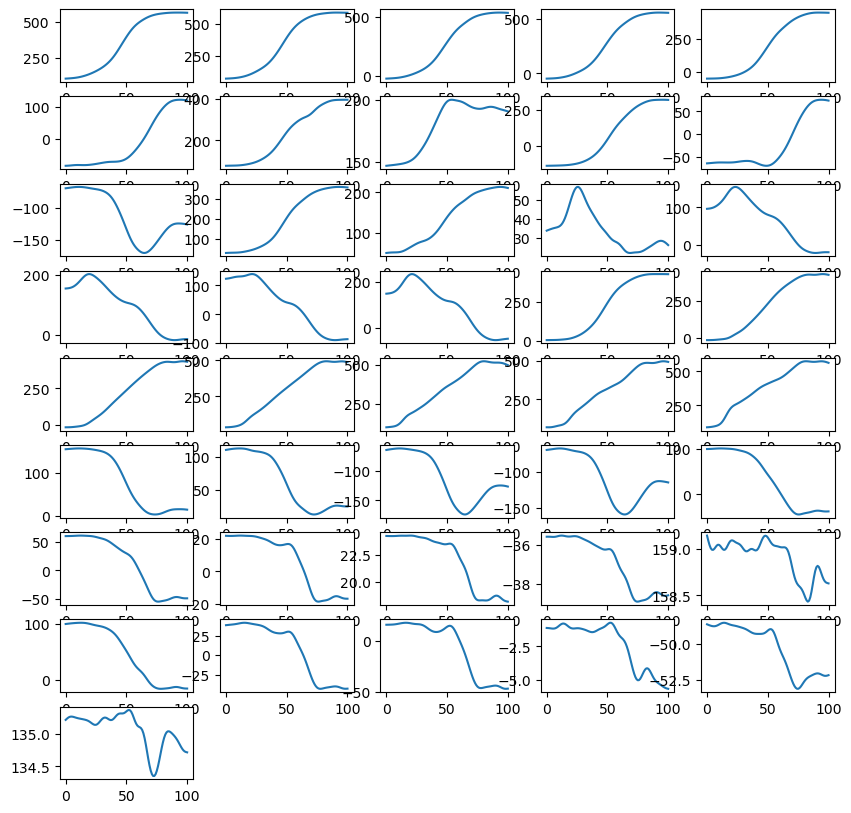

In [17]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_f_y.iloc[:, i])

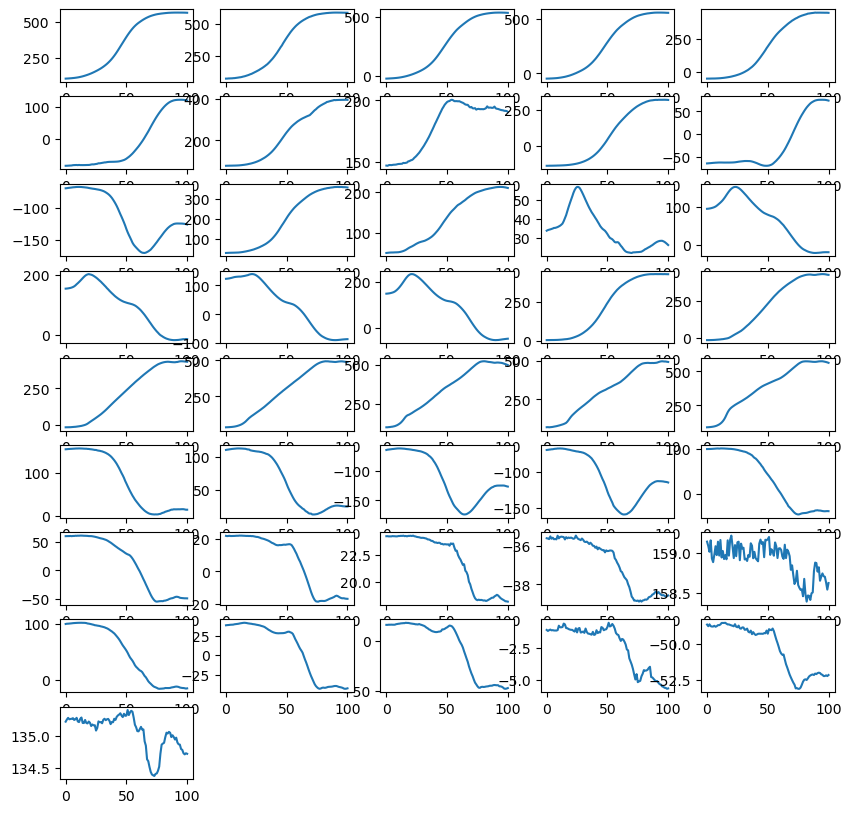

In [18]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_r_y.iloc[:, i])

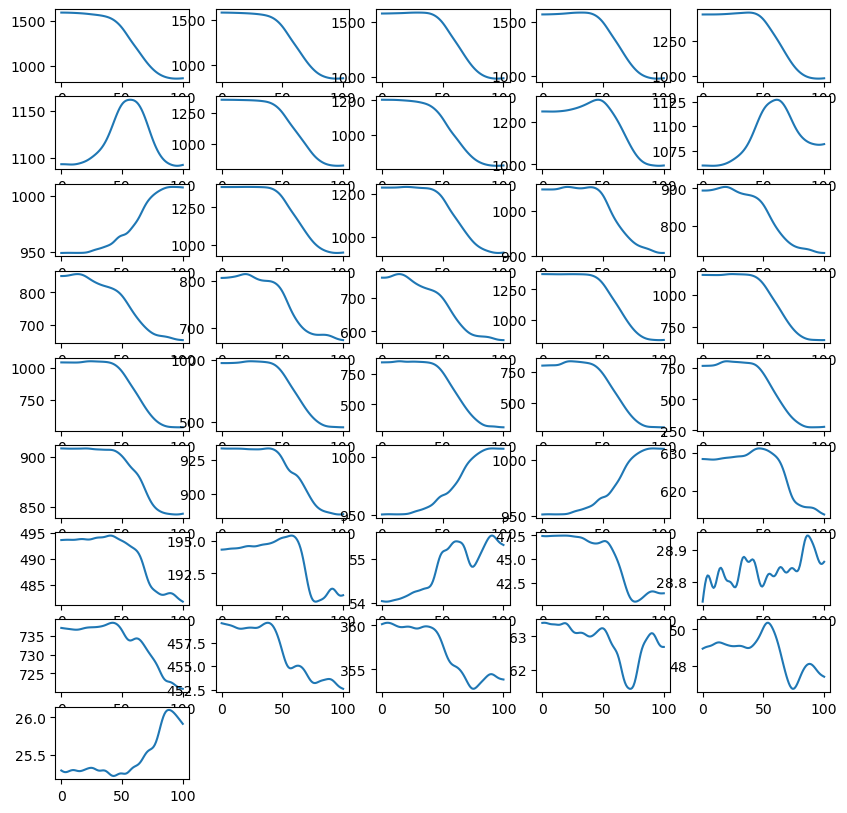

In [19]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_f_z.iloc[:, i])

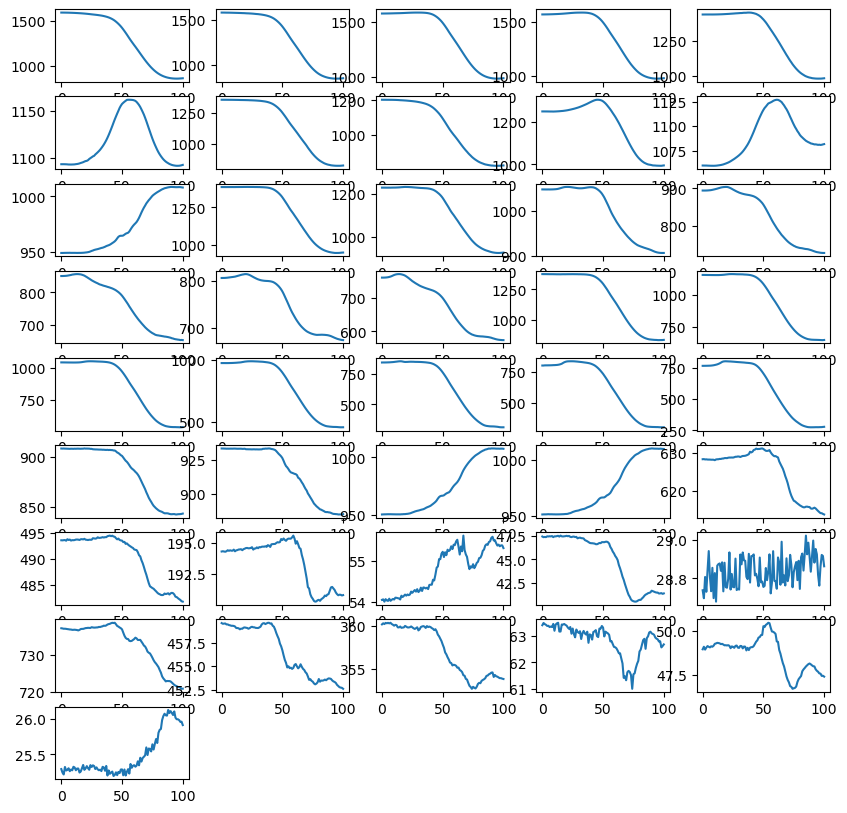

In [20]:
plt.figure(figsize=(10, 10))
for i in range(41):
  plt.subplot(9, 5, i+1)
  plt.plot(s_r_z.iloc[:, i])

In [21]:
s_r_info = s_r.iloc[:, -1]
s_f_info = s_f.iloc[:, -1]
print(s_r_info.equals(s_f_info))

True
